## Universidade do Estado do Amazonas
### Disciplina: Redes Neurais Artificiais 2025/1
### Integrantes: 
> Emanuelle Marreira - 2215080035

> Afonso Garcia - 1615080003

> Italo Ferreira - 2215080012

> João Carvalho - 2215080040 

## Identificador

In [30]:
identificador = (5+3+2+0)%4
print(identificador)

2


## Bibliotecas

In [31]:
import random
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=4, suppress=True)

## Definição do Neurônio Perceptron

In [32]:
class NeuronioPerceptron:
    def __init__(self, taxa_de_aprendizado = 0.1, n_features = 2, vies = -1):
        self.taxa_de_aprendizado = taxa_de_aprendizado
        self.n_features = n_features
        self.pesos_iniciais = np.random.uniform(-0.5, 0.5, size = self.n_features + 1)
        #self.pesos_iniciais = [-0.5441, 0.5562, -0.4074]
        self.pesos = self.pesos_iniciais.copy()
        self.epocas = 0
        self.total_ajustes_pesos = 0
        self.vies = vies

    def ativacao(self, theta):
        return np.where(theta >= 0, 1, 0)

    def prever(self, X_com_vies):
        entrada = np.dot(X_com_vies, self.pesos)
        print(f"{X_com_vies} * {self.pesos} = {np.round(entrada, 4)}")
        return self.ativacao(entrada)
    
    def realizar_ajuste(self, erro, xi):
        self.pesos = self.pesos + self.taxa_de_aprendizado * erro * xi
        self.total_ajustes_pesos += 1

    def treino(self, X_treino, y_treino):
        print(f"Pesos iniciais (w0, w1, w2): {self.pesos_iniciais}")
        X_treino_vies = np.insert(X_treino, 0, self.vies, axis = 1)

        convergiu = False
        while not convergiu:
            self.epocas += 1
            print(f"\n**********{self.epocas}a época**********\n")
            erros_na_epoca = 0
            ocorreu_erro = False

            for xi, yd in zip(X_treino_vies, y_treino):
                y_previsto = self.prever(xi)
                erro = yd - y_previsto

                if erro != 0:
                    print(f"!!!ERRO em: {xi} | {yd} - {y_previsto} = {erro}")
                    self.realizar_ajuste(erro, xi)
                    erros_na_epoca += 1
                    ocorreu_erro = True
            
            if not ocorreu_erro:
                convergiu = True
        print(f"\nConvergência alcançada!")
        print(f"Pesos finais: {self.pesos}")
        return self


In [33]:
# Teste com o exemplo da professora
X = [(2,2),(4,4)]
Y = [1,0]
neuronio_perceptron = NeuronioPerceptron(taxa_de_aprendizado = 0.1, n_features = 2)
neuronio_perceptron.treino(X, Y)
print(f"Número total de ajustes nos pesos: {neuronio_perceptron.total_ajustes_pesos}")
print(f"Número de épocas até a convergência: {neuronio_perceptron.epocas}")

Pesos iniciais (w0, w1, w2): [ 0.3799 -0.4403 -0.1609]

**********1a época**********

[-1  2  2] * [ 0.3799 -0.4403 -0.1609] = -1.5821
!!!ERRO em: [-1  2  2] | 1 - 0 = 1
[-1  4  4] * [ 0.2799 -0.2403  0.0391] = -1.0844

**********2a época**********

[-1  2  2] * [ 0.2799 -0.2403  0.0391] = -0.6821
!!!ERRO em: [-1  2  2] | 1 - 0 = 1
[-1  4  4] * [ 0.1799 -0.0403  0.2391] = 0.6156
!!!ERRO em: [-1  4  4] | 0 - 1 = -1

**********3a época**********

[-1  2  2] * [ 0.2799 -0.4403 -0.1609] = -1.4821
!!!ERRO em: [-1  2  2] | 1 - 0 = 1
[-1  4  4] * [ 0.1799 -0.2403  0.0391] = -0.9844

**********4a época**********

[-1  2  2] * [ 0.1799 -0.2403  0.0391] = -0.5821
!!!ERRO em: [-1  2  2] | 1 - 0 = 1
[-1  4  4] * [ 0.0799 -0.0403  0.2391] = 0.7156
!!!ERRO em: [-1  4  4] | 0 - 1 = -1

**********5a época**********

[-1  2  2] * [ 0.1799 -0.4403 -0.1609] = -1.3821
!!!ERRO em: [-1  2  2] | 1 - 0 = 1
[-1  4  4] * [ 0.0799 -0.2403  0.0391] = -0.8844

**********6a época**********

[-1  2  2] * [ 0.0799 -0

## Parte 1 - Resolvendo um problema linearmente separável

### Definição dos dados

In [34]:
dados = np.fromfile('dataAll.txt', dtype = np.float64)
dados = dados.reshape(-1,1,3)
print(f"Dados carregados: {dados.shape}")
dados = dados.reshape(-1, 3)
print(f"Dados carregados: {dados.shape}")
X = dados[:, [0,1]]  # x1 e x2
yd = dados[:, 2]   # yd
print(f"X = {X[:5]}...")
print(f"yd = {yd[:5]}...")

Dados carregados: (1000, 1, 3)
Dados carregados: (1000, 3)
X = [[-363.7884  244.1423]
 [ 328.7572 -256.7658]
 [-164.9827  613.2164]
 [ 536.5905  764.9575]
 [ 314.2297  343.8375]]...
yd = [0. 1. 0. 0. 0.]...


### Treinamento 

In [35]:
neuronio_perceptron = NeuronioPerceptron(taxa_de_aprendizado = 0.1, n_features = 2)
neuronio_perceptron = neuronio_perceptron.treino(X, yd)

print(f"Número total de ajustes nos pesos: {neuronio_perceptron.total_ajustes_pesos}")
print(f"Número de épocas até a convergência: {neuronio_perceptron.epocas}")

Pesos iniciais (w0, w1, w2): [ 0.4019 -0.2833 -0.0081]

**********1a época**********

[  -1.     -363.7884  244.1423] * [ 0.4019 -0.2833 -0.0081] = 100.7041
!!!ERRO em: [  -1.     -363.7884  244.1423] | 0.0 - 1 = -1.0
[  -1.      328.7572 -256.7658] * [  0.5019  36.0955 -24.4223] = 18136.9642
[  -1.     -164.9827  613.2164] * [  0.5019  36.0955 -24.4223] = -20931.7839
[ -1.     536.5905 764.9575] * [  0.5019  36.0955 -24.4223] = 685.9913
!!!ERRO em: [ -1.     536.5905 764.9575] | 0.0 - 1 = -1.0
[ -1.     314.2297 343.8375] * [   0.6019  -17.5635 -100.918 ] = -40218.995
[  -1.      -87.6395 -306.9783] * [   0.6019  -17.5635 -100.918 ] = 32518.3061
[  -1.     -172.0622 -500.5087] * [   0.6019  -17.5635 -100.918 ] = 53531.7762
[ -1.     727.9602 358.2956] * [   0.6019  -17.5635 -100.918 ] = -48944.6517
!!!ERRO em: [ -1.     727.9602 358.2956] | 1.0 - 0 = 1.0
[ -1.     752.3574 268.3682] * [  0.5019  55.2325 -65.0885] = 24086.3827
[  -1.      685.6276 -833.4677] * [  0.5019  55.2325 -65.08

### Impressão dos resultados

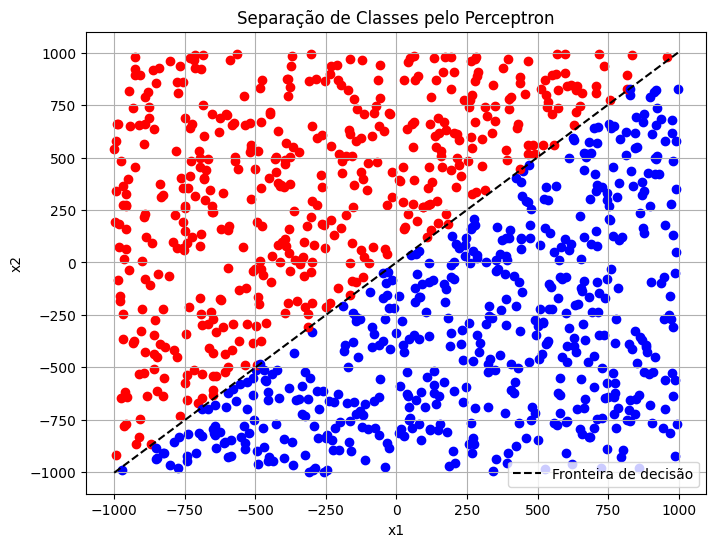

In [36]:
plt.figure(figsize=(8, 6))

for i in range(len(X)):
    cor = 'red' if yd[i] == 0 else 'blue'
    plt.scatter(X[i][0], X[i][1], c=cor)
    
w = neuronio_perceptron.pesos
x_1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)

if w[2] != 0:
    x_2 = (w[0]/w[2]) - ((w[1]/w[2]) * x_1)
    plt.plot(x_1, x_2, 'k--', label='Fronteira de decisão')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Separação de Classes pelo Perceptron')
plt.grid(True)
plt.legend()
plt.show()

## Parte 3 - Validação Holdout em Problema Não-Linearmente Separável

### Carregando os Dados

In [37]:
dadosh = np.fromfile('dataHoldout.txt', dtype = np.float64)
dadosh = dadosh.reshape(-1,1,3)
print(f"Dados carregados: {dados.shape}")
dadosh = dadosh.reshape(-1, 3)

Dados carregados: (1000, 3)


### Mostrando Gráfico Inicial

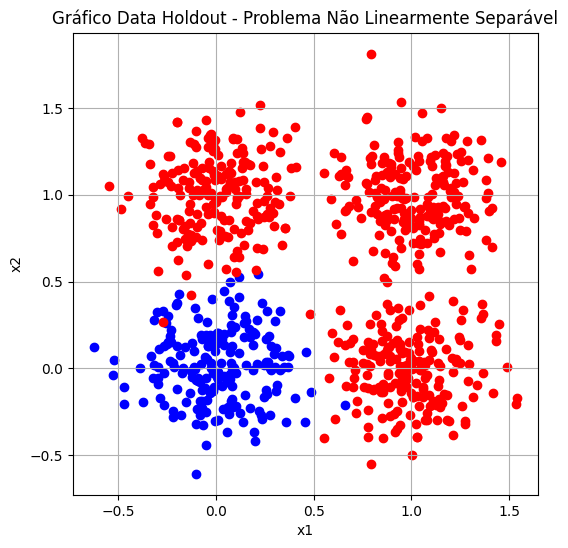

In [38]:
plt.figure(figsize=(6, 6))
for ponto in dadosh:
    cor = 'red' if ponto[2] == 0 else 'blue'
    plt.scatter(ponto[0], ponto[1], c=cor)

plt.title('Gráfico Data Holdout - Problema Não Linearmente Separável')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()

## Dados para divisão Holdout

In [39]:
random.seed(identificador)
random.shuffle(dados)
porcentagem = 70/100
ponto_divisao = int(len(dados) * porcentagem )
treino = dados[:ponto_divisao]
teste = dados[ponto_divisao:]
X_treino = np.array([dado[:2] for dado in treino])  
y_treino = np.array([dado[2] for dado in treino])
X_teste = np.array([dado[:2] for dado in teste])  
y_teste = np.array([dado[2] for dado in teste])

##  Neurônio Perceptron

In [40]:
class NeuronioPerceptron:
    def __init__(self, taxa_de_aprendizado = 0.1, n_features = 2, vies = -1):
        self.taxa_de_aprendizado = taxa_de_aprendizado
        self.n_features = n_features
        self.pesos_iniciais = np.random.uniform(-0.5, 0.5, size = self.n_features + 1)
        self.pesos = self.pesos_iniciais.copy()
        self.epocas = 0
        self.total_ajustes_pesos = 0
        self.vies = vies

    def ativacao(self, theta):
        return np.where(theta >= 0, 1, 0)

    def prever(self, X_com_vies):
        entrada = np.dot(X_com_vies, self.pesos)
        print(f"{X_com_vies} * {self.pesos} = {np.round(entrada, 4)}")
        return self.ativacao(entrada)
    
    def realizar_ajuste(self, erro, xi):
        self.pesos = self.pesos + self.taxa_de_aprendizado * erro * xi
        self.total_ajustes_pesos += 1

    def treino(self, X_treino_vies, y_treino):
        print(f"Pesos iniciais (w0, w1, w2): {self.pesos_iniciais}")
        X_treino_vies = np.insert(X_treino, 0, self.vies, axis = 1)

        while self.epocas <= 99:
            print(f"\n**********{self.epocas}a época**********\n")
            erros_na_epoca = 0
            
            indices = list(range(len(X_treino_vies)))
            random.shuffle(indices)
            X_treino_vies = X_treino_vies[indices]
            y_treino = y_treino[indices]

            for xi, yd in zip(X_treino_vies, y_treino):
                y_previsto = self.prever(xi)
                erro = yd - y_previsto

                if erro != 0:
                    print(f"!!!ERRO em: {xi} | {yd} - {y_previsto} = {erro}")
                    self.realizar_ajuste(erro, xi)
                    erros_na_epoca += 1
            self.epocas += 1
        print(f"\nConvergência alcançada!")
        print(f"Pesos finais: {self.pesos}")
        return self


## Treinamento do Neurônio

In [41]:
neuronio_perceptron = NeuronioPerceptron(taxa_de_aprendizado = 0.1, n_features = 2)
neuronio_perceptron = neuronio_perceptron.treino(X_treino, y_treino)

print(f"Número total de ajustes nos pesos: {neuronio_perceptron.total_ajustes_pesos}")
print(f"Número de épocas até a convergência: {neuronio_perceptron.epocas}")

Pesos iniciais (w0, w1, w2): [0.3312 0.269  0.4725]

**********0a época**********

[  -1.     -822.3854 -549.6054] * [0.3312 0.269  0.4725] = -481.2377
[ -1.     361.2056 -32.176 ] * [0.3312 0.269  0.4725] = 81.6315
[  -1.     -907.1586 -747.1332] * [0.3312 0.269  0.4725] = -597.3716
[  -1.     -755.1501  862.7146] * [0.3312 0.269  0.4725] = 204.1539
!!!ERRO em: [  -1.     -755.1501  862.7146] | 0.0 - 1 = -1.0
[  -1.     -375.8684  -40.1123] * [  0.4312  75.784  -85.799 ] = -25043.6528
[ -1.     -67.9685 477.3104] * [  0.4312  75.784  -85.799 ] = -46104.0982
[  -1.      -40.5246 -978.4265] * [  0.4312  75.784  -85.799 ] = 80876.4393
[  -1.     -274.4895 -700.2848] * [  0.4312  75.784  -85.799 ] = 39281.3685
[  -1.     -740.9271   90.726 ] * [  0.4312  75.784  -85.799 ] = -63935.0577
[  -1.     -774.6295 -979.8771] * [  0.4312  75.784  -85.799 ] = 25367.4839
[  -1.     -252.849    70.6829] * [  0.4312  75.784  -85.799 ] = -25226.8632
[  -1.      978.3342 -308.6226] * [  0.4312  75.784  

## Testes após treinamento

In [44]:
X_teste = np.insert(X_teste, 0, neuronio_perceptron.vies, axis = 1)
previsoes = neuronio_perceptron.prever(X_teste)

[[  -1.     -963.7963 -780.979 ]
 [  -1.     -530.9124 -292.3363]
 [  -1.      890.6686  427.2266]
 [  -1.     -907.1586 -747.1332]
 [  -1.     -597.7617  155.5969]
 [  -1.     -712.0443  989.6024]
 [  -1.      525.8853 -986.6906]
 [  -1.     -455.4894 -617.6617]
 [  -1.     -143.3843  -93.8622]
 [  -1.      -29.8922  -47.9733]
 [  -1.     -257.44   -998.0658]
 [  -1.      531.5406  739.1592]
 [  -1.      744.6964 -575.2869]
 [  -1.      597.2691  996.1494]
 [  -1.     -126.8979   58.5113]
 [  -1.      747.8561 -644.4825]
 [  -1.      769.2864 -722.0692]
 [  -1.     -165.043    -4.5746]
 [  -1.      314.2297  343.8375]
 [  -1.     -828.5711 -638.6037]
 [  -1.      679.8148 -477.5763]
 [  -1.      113.2774  271.7146]
 [  -1.     -890.507   660.3464]
 [  -1.      282.0746  335.8412]
 [  -1.     -756.0477  192.1852]
 [  -1.      906.0399  614.3291]
 [  -1.     -777.467  -449.0593]
 [  -1.      836.9431  366.2893]
 [  -1.      728.0715 -503.3633]
 [  -1.      834.7961 -412.3571]
 [  -1.   

## 1) Matriz de confusão

In [45]:
def matriz_de_confusao(previsoes, y_teste):
    VP = 0 
    VN = 0 
    FP = 0 
    FN = 0 
    for prev, real in zip(previsoes, y_teste):
        if prev == 1 and real == 1:
            VP += 1
        elif prev == 0 and real == 0:
            VN += 1
        elif prev == 1 and real == 0:
            FP += 1
        elif prev == 0 and real == 1:
            FN += 1
    return {'VP': VP, 'VN': VN, 'FP': FP, 'FN': FN}

In [46]:
print(matriz_de_confusao(previsoes, y_teste))

{'VP': 148, 'VN': 152, 'FP': 0, 'FN': 0}


# PARTE 2

In [ ]:
import numpy as np

class NeuronioPerceptron:
    def __init__(self, taxa_de_aprendizado, n_features=2, intervalo=(-0.5, 0.5), vies=-1):
        self.taxa_de_aprendizado = taxa_de_aprendizado
        self.n_features = n_features
        self.intervalo = intervalo
        self.pesos_iniciais = np.random.uniform(intervalo[0], intervalo[1], size=self.n_features + 1)
        self.pesos = self.pesos_iniciais.copy()
        self.epocas = 0
        self.total_ajustes_pesos = 0
        self.vies = vies

    def ativacao(self, theta):
        return np.where(theta >= 0, 1, 0)

    def prever(self, xi):
        entrada = np.dot(xi, self.pesos)
        #print(f"{xi} * {self.pesos} = {np.round(entrada, 4)}")
        return self.ativacao(entrada)

    def realizar_ajuste(self, erro, xi):
        self.pesos += self.taxa_de_aprendizado * erro * xi
        self.total_ajustes_pesos += 1

    def treino(self, X_treino, y_treino):
        #print(f"Pesos iniciais (w0, w1, w2): {self.pesos_iniciais}")
        X_treino_vies = np.insert(X_treino, 0, self.vies, axis=1)

        convergiu = False
        while not convergiu:
            self.epocas += 1
            #print(f"\n********** {self.epocas}ª época **********\n")
            ocorreu_erro = False

            for xi, yd in zip(X_treino_vies, y_treino):
                y_previsto = self.prever(xi)
                erro = yd - y_previsto

                if erro != 0:
                    #print(f"!!! ERRO em: {xi} | {yd} - {y_previsto} = {erro}")
                    self.realizar_ajuste(erro, xi)
                    ocorreu_erro = True

            if not ocorreu_erro:
                convergiu = True

        #print(f"\nConvergência alcançada!")
        #print(f"Pesos finais: {self.pesos}")
        return self

In [ ]:
dados = np.fromfile('data2.txt', dtype=np.float64)

# Remove o excedente para que o reshape funcione corretamente
n_valores_validos = (dados.size // 3) * 3
dados = dados[:n_valores_validos]  # corta o lixo do final, se tiver

dados = dados.reshape(-1, 3)
X = dados[:, :2]
yd = dados[:, 2]

taxas = [0.4, 0.1, 0.01]
intervalos = [(-100, 100), (-0.5, 0.5)]

In [ ]:
ajustes = []
epocas = []
for repeticao in range(10):
    perceptron = NeuronioPerceptron(taxa_de_aprendizado=0.4, intervalo=(-100, 100))
    perceptron.treino(X, yd)
    ajustes.append(perceptron.total_ajustes_pesos)
    epocas.append(perceptron.epocas)
print(f"η=0.4,(-100, 100), {np.mean(ajustes):.2f}, {np.std(ajustes):.2f}, {min(epocas)}")

In [ ]:
ajustes = []
epocas = []
for repeticao in range(10):
    perceptron = NeuronioPerceptron(taxa_de_aprendizado=0.4, intervalo=(-0.5, 0.5))
    perceptron.treino(X, yd)
    ajustes.append(perceptron.total_ajustes_pesos)
    epocas.append(perceptron.epocas)
print(f"η=0.4,(-0.5, 0.5), {np.mean(ajustes):.2f}, {np.std(ajustes):.2f}, {min(epocas)}")

In [ ]:
ajustes = []
epocas = []
for repeticao in range(10):
    perceptron = NeuronioPerceptron(taxa_de_aprendizado=0.1, intervalo=(-100, 100))
    perceptron.treino(X, yd)
    ajustes.append(perceptron.total_ajustes_pesos)
    epocas.append(perceptron.epocas)
print(f"η=0.1,(-100, 100), {np.mean(ajustes):.2f}, {np.std(ajustes):.2f}, {min(epocas)}")

In [ ]:
ajustes = []
epocas = []
for repeticao in range(10):
    perceptron = NeuronioPerceptron(taxa_de_aprendizado=0.1, intervalo=(-0.5, 0.5))
    perceptron.treino(X, yd)
    ajustes.append(perceptron.total_ajustes_pesos)
    epocas.append(perceptron.epocas)
print(f"η=0.1,(-0.5, 0.5), {np.mean(ajustes):.2f}, {np.std(ajustes):.2f}, {min(epocas)}")

In [ ]:
ajustes = []
epocas = []
for repeticao in range(10):
    perceptron = NeuronioPerceptron(taxa_de_aprendizado=0.01, intervalo=(-100, 100))
    perceptron.treino(X, yd)
    ajustes.append(perceptron.total_ajustes_pesos)
    epocas.append(perceptron.epocas)
print(f"η=0.01,(-100, 100), {np.mean(ajustes):.2f}, {np.std(ajustes):.2f}, {min(epocas)}")

In [ ]:
ajustes = []
epocas = []
for repeticao in range(10):
    perceptron = NeuronioPerceptron(taxa_de_aprendizado=0.01, intervalo=(-0.5, 0.5))
    perceptron.treino(X, yd)
    ajustes.append(perceptron.total_ajustes_pesos)
    epocas.append(perceptron.epocas)
print(f"η=0.01,(-0.5, 0.5), {np.mean(ajustes):.2f}, {np.std(ajustes):.2f}, {min(epocas)}")